# Matrix Inverse

## Exercise 8-1.
##### The inverse of the inverse is the original matrix; in other words, 
(
𝐀
-
1
)
-
1
=
𝐀
. This is analgous to how 
1
/
(
1
/
𝑎
)
=
𝑎
. Illustrate this using Python.

In [1]:
import numpy as np

A= np.random.rand(3,3)

A_inv = np.linalg.inv(A)

A_inv_inv = np.linalg.inv(A_inv)

A, A_inv_inv

(array([[0.89356665, 0.84460956, 0.92390723],
        [0.70601461, 0.73075582, 0.83477707],
        [0.07301655, 0.29729439, 0.60216714]]),
 array([[0.89356665, 0.84460956, 0.92390723],
        [0.70601461, 0.73075582, 0.83477707],
        [0.07301655, 0.29729439, 0.60216714]]))

## Exercise 8-2.

#### Implement the full algorithm described in “Inverting Any Square Full-Rank Matrix” and reproduce Figure 8-3. Of course, your matrices will look different from Figure 8-3 because of random numbers, although the grid and identity matrices will be the same.

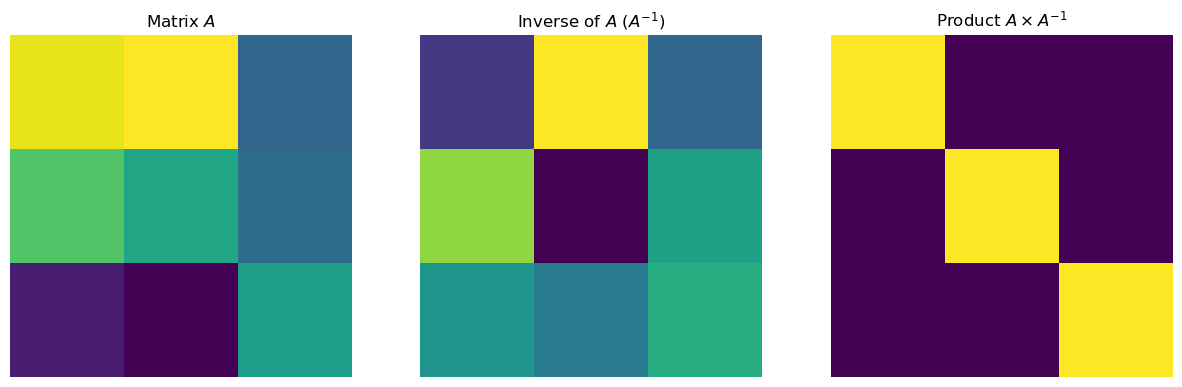

In [2]:
import matplotlib.pyplot as plt

A = np.random.rand(3, 3)

while np.linalg.matrix_rank(A) != 3:
    A = np.random.rand(3, 3)

A_inv = np.linalg.inv(A)
A_product = np.dot(A, A_inv)

fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].imshow(A, cmap='viridis')
axes[0].set_title('Matrix $A$')
axes[0].set_axis_off()

axes[1].imshow(A_inv, cmap='viridis')
axes[1].set_title('Inverse of $A$ ($A^{-1}$)')
axes[1].set_axis_off()

axes[2].imshow(A_product, cmap='viridis')
axes[2].set_title('Product $A \\times A^{-1}$')
axes[2].set_axis_off()